# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
from scipy.stats import norm
from scipy.stats import ttest_ind
medical = pd.read_csv('C:/Sereda/Lectures/Springboard/11/1.3/insurance2.csv')

In [35]:
medical.shape

(1338, 8)

In [36]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ Since the distribution of charges is highly skewed, the mean value is not a good measure of a typical value; the median is more appropriate. Likewise, standard deviation is not a good measure of the spread in skewed data; the interquartile range (IQR) is preferable.

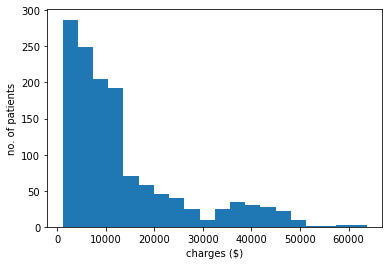

In [37]:
_ = plt.hist(medical.charges, bins=20)
_ = plt.xlabel('charges ($)')
_ = plt.ylabel('no. of patients')
plt.show()

In [25]:
charge_av = np.mean(medical.charges)
charge_sd = np.std(medical.charges, ddof=1)
print("mean charge = $"+str(charge_av))
print("SD of charge = $"+str(charge_sd))

mean charge = $13270.422265141257
SD of charge = $12110.011236693994


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ The most appropriate is bootstrap resampling test, which does not carry any assumptions about the distribution of individual values. We can repeat this resampling with replacement many times to narrow down the confidence interval for the average charge until our confidence interval does not include 12,000 and thus we shall find out if the average charge is below or still above this critical threshold.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ The confidence interval for the charges is [12720.29, 13853.98]. The null hypothesis would be that the average charge is still above 12,000, and the alternative hypothesis, for which we would have to provide a convincing proof, is that the average charge is below 12,000. Having "<" comparison sign implies <b>one-sided</b> hypotesis test.

In [39]:
CL = 0.95
print("confidence level =",CL)
cum_prob = 1-CL
print("cumulative probability Pr(z<z_critical) = ",cum_prob)
z_critical = norm.ppf(cum_prob)
print("critical z-score =",z_critical)

confidence level = 0.95
cumulative probability Pr(z<z_critical) =  0.050000000000000044
critical z-score = -1.6448536269514722


We can use z-score instead t-score since the number of samples will be large enough.

In [26]:
def bootstrap(data, n_sample, n_resample):
    print("Bootstrapping: sample size = "+str(n_sample)+", resampled "+str(n_resample)+ " times")
    means = np.empty(n_resample)
    for i in range(n_resample):
        means[i] = np.mean(data.sample(n_sample, replace=True))
    ave = np.mean(means)
    print("average Mean =",ave)
    std = np.std(means, ddof=1)
    print("estimated SE =",std)
    ME = np.abs(z_critical)*std
    print("Margin of Error =",ME)
    CI = [ave-ME, ave+ME]
    print("Confidence Interval =",CI)
    return means, ave, std

In [ ]:
for n_resample in range(2,501):
    charge_means, charge_av, charge_se = bootstrap(medical.charges, medical.shape[0], n_resample)
    # write to file
    fd = open('C:/Sereda/Lectures/Springboard/11/1.3/boots_converg.csv', 'a')
    fd.write(str(n_resample)+","+str(charge_av)+","+str(charge_se)+"\n")
    fd.close()

Estimated SE compares well to the SD of the entire sample, divided by sqrt(n):

In [27]:
se_theor = charge_sd/np.sqrt(medical.shape[0])
print("theoretical standard error of the mean se_theor = ",se_theor)

theoretical standard error of the mean se_theor =  331.06745431568226


Confidence Interval is narrow enough (does not include threshold value of 12,000), and is above 12,000. Therefore, we conclude that the average charge has not dropped below the threshold.

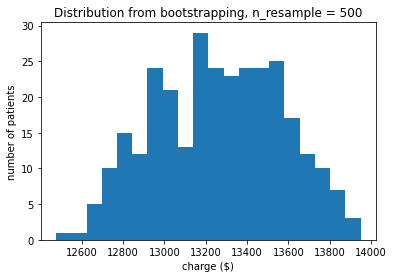

In [184]:
_ = plt.hist(means, bins=20)
_ = plt.xlabel('charge ($)')
_ = plt.ylabel('number of patients')
_ = plt.title("Distribution from bootstrapping, n_resample = "+str(n_resample))

In [185]:
boots_converg = pd.read_csv('C:/Sereda/Lectures/Springboard/11/1.3/boots_converg.csv', names=['n_resample','av_boots','se_boots'])
boots_converg.head()

,n_resample,av_boots,se_boots
0,2,13341.745481,385.317877
1,3,13322.983381,142.158075
2,4,13360.128609,486.091133
3,5,13093.310151,260.384663
4,6,13291.123078,408.713707


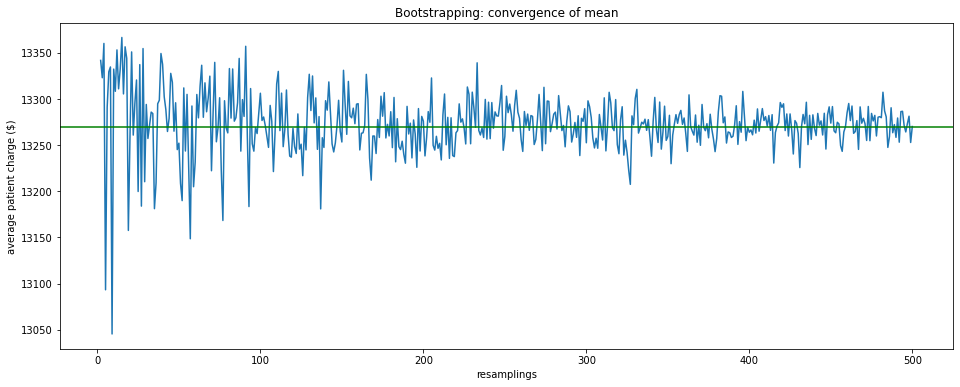

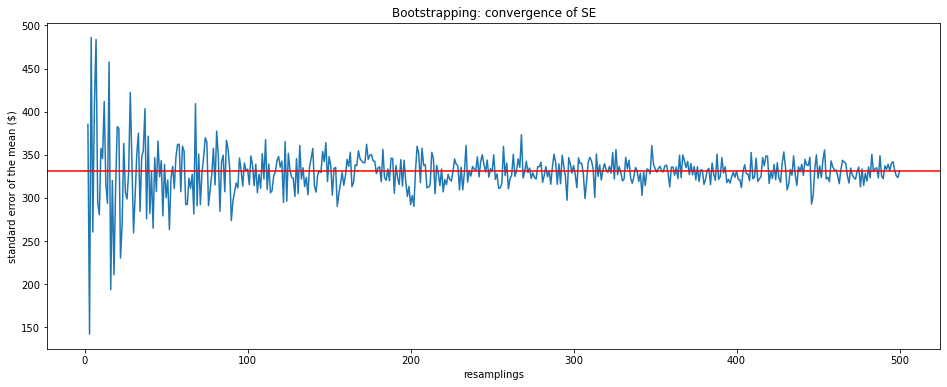

In [186]:
n_vals = np.arange(2,500+1)
#av_boots = np.array([13387.974251187221,13277.266756798215,13382.825486224785,13379.124840026308,13373.951685049082,13212.041347894938,13161.912300019343,13251.239365833915,13074.98070146548,13334.944050178565,13497.528063095044,13297.018359642007,13319.71584271669,13343.667356116797,13224.429069758928,13395.48836235765,13180.046441926093,13159.505315350212,13323.65561493442,13206.612635650117,13233.344997369584,13212.926705476933,13294.334625153379,13329.010736513457,13250.065328220855,13250.065328220855])
av_boots = boots_converg.av_boots
#se_boots = np.array([160.7194940501898,307.26370510915575,405.81739396999876,338.756243824317,386.13617208529257,492.34264740378575,255.8252008525749,187.65569370612323,136.22041700070253,359.9647874252242,355.0514854750895,299.97609722520303,342.6325661612998,266.11075091816605,350.4050562983588,253.37218513468196,323.24682131586076,373.36600359414916,345.83168987115107,285.81637118510537,322.1191730577437,277.42738152146615,243.98437315907478,296.5178379318005,359.11324774429835,359.11324774429835])
se_boots = boots_converg.se_boots
_ = plt.figure(figsize=(16,6))
_ = plt.plot(n_vals, boots_converg.av_boots)
_ = plt.xlabel('resamplings')
_ = plt.ylabel('average patient charge ($)')
_ = plt.axhline(y = charge_av, color = 'g', linestyle = '-')
_ = plt.title('Bootstrapping: convergence of mean')
plt.show()
_ = plt.figure(figsize=(16,6))
_ = plt.plot(n_vals, boots_converg.se_boots)
_ = plt.xlabel('resamplings')
_ = plt.ylabel('standard error of the mean ($)')
_ = plt.title('Bootstrapping: convergence of SE')
_ = plt.axhline(y = se_theor, color = 'r', linestyle = '-')
plt.show()

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ Null hypothesis: mean charge amounts are same for uninsured and insured patients. Alternative hypothesis: the mean charges are different for these two groups. As follows from comparison of t-scores from bootstrapping and `ttest_ind` function in the next Q6, equal variances are assumed.

H<sub>0</sub>: μ<sub>0</sub> - μ<sub>1</sub> = 0 <br>
H<sub>a</sub>: μ<sub>0</sub> - μ<sub>1</sub> ≠ 0 <br>

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ Hypothesis test result: reject H<sub>0</sub>. Mean charge amount for uninsured patients is considerably lower than that for insured patients. T-statistic values from bootstrap and `ttest_ind` function are close to each other.

In [28]:
insured = medical.loc[medical['insuranceclaim'] == 1, 'charges']
print(insured.head(2))
uninsured = medical.loc[medical['insuranceclaim'] == 0, 'charges']
print(uninsured.head(2))

0    16884.9240
1     1725.5523
Name: charges, dtype: float64
2     4449.46200
3    21984.47061
Name: charges, dtype: float64


In [29]:
n0 = uninsured.shape[0]
print("No. of uninsured n0 =",n0)
n1 = insured.shape[0]
print("No. of insured n1 =",n1)

No. of uninsured n0 = 555
No. of insured n1 = 783


In [31]:
x0_av = np.mean(uninsured)
x1_av = np.mean(insured)
print("uninsured mean charge x0_av =",x0_av)
print("insured mean charge x1_av =",x1_av)

uninsured mean charge x0_av = 8821.421892306294
insured mean charge x1_av = 16423.928276537663


In [32]:
s0 = np.std(uninsured, ddof=1)
print("uninsured charge SD s0 =",s0)
s1 = np.std(insured, ddof=1)
print("insured charge SD s1 =",s1)

uninsured charge SD s0 = 6446.510126811736
insured charge SD s1 = 14045.928418802127


In [33]:
sp = np.sqrt(((n0-1)*s0**2+(n1-1)*s1**2)/(n0+n1-2))
print("pooled SD sp =",sp)

pooled SD sp = 11520.034268775256


In [34]:
SE = sp*np.sqrt(1/n0 + 1/n1)
print("Standard Error of the difference of mean values SE =",SE)
t = (x0_av - x1_av)/SE
print("t-test statistic t =",t)

Standard Error of the difference of mean values SE = 639.2260351391293
t-test statistic t = -11.89329903087671


Since |t| is considerably larger than commonly used critical scores ~ 2, the difference in mean charge amounts is significant, so that we reject H<sub>0</sub>.

Now let us perform T-test for the means of two independent samples using scipy.stats [https://www.tutorialspoint.com/scipy/scipy_stats.htm]:

In [202]:
ttest_ind(uninsured,insured)

Ttest_indResult(statistic=-11.893299030876712, pvalue=4.461230231620717e-31)

t-statistic from bootstrapping is the same as that from `ttest_ind`. This test assumes that the populations have identical variances by default.

In [203]:
print(ttest_ind(uninsured,insured, equal_var=False))

Ttest_indResult(statistic=-13.298031957975649, pvalue=1.1105103216309125e-37)


Without assuming equal variance, a larger difference between bootstrapping and `ttest_ind` t-statistics is obtained, which means that assumption of equal variances was used in Q4 formulae.

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__The Two-Sample T-test function is `ttest_ind`.
There is no dedicated Z-test function in scipy. One of the ways to perform Z-test is to calculate the pooled standard error and z-score using the formulae, and then use `norm.cdf` to find the relevant p-value, as shown below. The Two-Sample Z-test is used to compare the means of two samples to see if it is feasible that they come from the same population [1].

[1] Sprinthall, R. C. (2011). Basic Statistical Analysis (9th ed.). Pearson Education

An example of how to perform a Z-test: [https://stats.stackexchange.com/questions/124096/two-samples-z-test-in-python]

In [211]:
def twoSampZ(x1_av, x2_av, mudiff, sd1, sd2, n1, n2):
    from numpy import sqrt, abs, round
    from scipy.stats import norm
    pooledSE = sqrt(sd1**2/n1 + sd2**2/n2)
    print("pooled SE =",pooledSE)
    z = ((x1_av - x2_av) - mudiff)/pooledSE
    pval = 2*(1 - norm.cdf(abs(z)))
    print("z =",round(z, 3))
    print("p-value =",round(pval, 4))
    return round(z, 3), round(pval, 4)

In [213]:
z, pv = twoSampZ(x0_av, x1_av, 0, s0, s1, n0, n1)

pooled SE = 571.701617822604
z = -13.29
p-value = 0.0


Expectedly, z-score is close to the t-score in absence of assumption of equal variances.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test